In [1]:
from pipelines import preprocessor, preprocessor2

In [2]:
from preprocess import separate, extra_features

In [30]:
data=pd.read_csv("Datasets/train.csv")

<IPython.core.display.Javascript object>

In [4]:
data.shape

(18506, 21)

In [60]:
data=extra_features(data)

In [6]:
data.shape

(18506, 25)

In [7]:
separate(data)

Target Column: ['cost_category']

Numerical Columns: ['night_mainland', 'night_zanzibar', 'total_nights']

Categorical Columns: ['age_group', 'travel_with', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz', 'trip_length', 'group_size']

Text Columns: ['Tour_ID', 'country', 'purpose', 'main_activity', 'info_source']


In [8]:
data=data.drop(columns=['Tour_ID', 'total_nights', 'night_zanzibar', 'night_mainland'])
data.shape

(18506, 21)

In [9]:
X=preprocessor2(data)
X.shape

(18506, 192)

In [10]:
X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
y=data['cost_category']
y.shape

(18506,)

In [12]:
le=LabelEncoder()
y=le.fit_transform(y)
y

<IPython.core.display.Javascript object>

array([0, 0, 1, ..., 1, 1, 3])

In [13]:
y.shape

(18506,)

In [14]:
from kfold import skfold

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pipe1=preprocessor(data)
pipe2=preprocessor2(data)

models={
    "Tree": DecisionTreeClassifier(),
    "Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "Lgbm": LGBMClassifier(),
    "NNN": MLPClassifier()
}

vectors={
    "Pipe1": pipe1,
    "Pipe2": pipe2
}


In [21]:
from kfold import skfold
all_models=[]

for class_model in models:
    for sample in vectors:
        all_models.append(skfold(class_model, sample, y, fold))
        print(f"Model: {class_model}_{sample}...\n")

ValueError: Found input variables with inconsistent numbers of samples: [5, 18506]

In [22]:
import numpy as np
from scipy.stats.mstats import winsorize

# Generate some random data with outliers
data = np.random.normal(0, 1, 1000)
data[950:] = 10

# Winsorize the data to handle outliers
data_winsorized = winsorize(data, limits=[0.05, 0.05])

# Print the mean and standard deviation of the original and winsorized data
print("Original mean:", np.mean(data))
print("Original std dev:", np.std(data))
print("Winsorized mean:", np.mean(data_winsorized))
print("Winsorized std dev:", np.std(data_winsorized))

Original mean: 0.5144225155448143
Original std dev: 2.3864299977631607
Winsorized mean: 0.2054066341564273
Winsorized std dev: 1.1684860787749516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

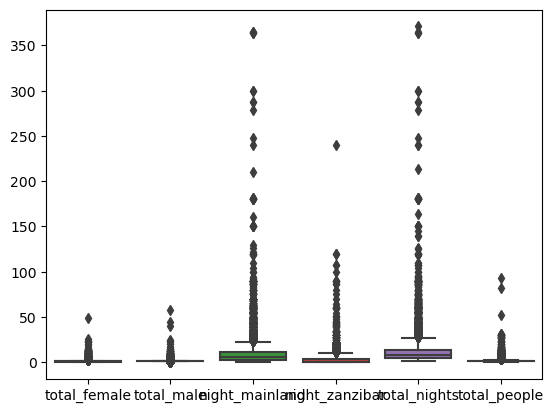

In [61]:
sns.boxplot(data=data)
plt.show();

<IPython.core.display.Javascript object>

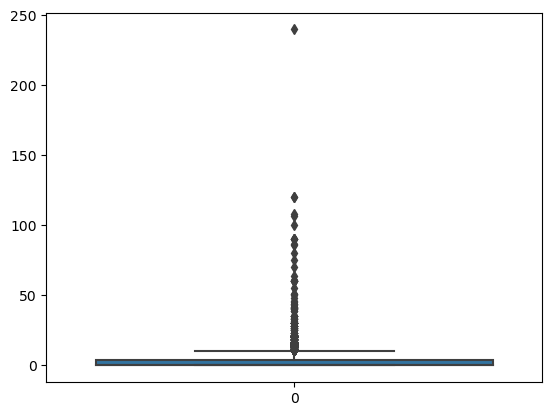

In [59]:
sns.boxplot(data=data['night_zanzibar']);

In [47]:
data_winsorized = winsorize(data, limits=[0.05, 0.05])
sns.boxplot(data_winsorized)
plt.show();

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


AttributeError: 'DataFrame' object has no attribute 'ravel'